# Natural Language Processing Pipeline and Classification of Cyberbullying Tweets

## Abstract

<p style="line-height:2.0">This report aims to classify cyberbullying instances from tweet text data from twitter. By demonstrating the effectiveness of the NLP preprocessing pipeline of tweet text data and its subsequent classification, it is hoped that this will enable the development of an effective cbyberbullying prevention tool. The tweet text data was preprocessed as part of an NLP preprocessing pipeline. The cleaned text then underwent TFIDF vectorisation and was fitted using Linear SVC and Multinomial Naive Bayes models which were optimised and validated through hyperparameter tuning and cross validation respectively and a dummy classifier was also used as a baseline. The results were promising showing high accuracy, recall, precision and f1-scores for both models but particularly Linear SVC. Avenues for further work include a majority voting ensemble of classifiers for better overall performance.


## Introduction

<p style="line-height:2.0"> Cyberbullying is bullying with digital technologies. It can occur across several platforms including social media, online gaming, chat rooms, emails, texts, etc. It is repetitive behaviour which aims to frighten, harass, anger or shame victims. <sup>[1]</sup> </p>


 Some examples are:

<ul>

•	Sending hurtful, abusive, threatening or harassing messages including those relating to religion, race, sex etc.

•	Spreading lies or embarrassing photos, videos and memes, aimed to humiliate and degrade on social media 

•	Impersonating individuals and sending hurtful messages on their behalf using fake accounts.       
                                                                                                
<div style="text-align: right;">
<sup>[1]</sup>
</div>                                                                                                             
                                                                                                       

 </ul>      
      
<p style="line-height:2.0"> The effects of cyberbullying on victims can be devastating, taking a toll emotionally, mentally and physically. Victims may turn to substances such as alcohol or drugs to deal with their trauma. In extreme cases, victims commit suicide.<sup>[1]</sup>
Given the serious nature of cyberbullying, it is of great importance to identify such behaviour. Accounts exhibiting such behaviour should be subject to serious consequences such as having their accounts blocked or accounts banned altogether to stop their cyberbullying perpetuating, preventing further harm to the victim. </p> 

## Literature Review


<p style="line-height:2.0"> A study by Saravanarj et  al.<sup>[2]</sup>  was based on the automatic detection of cyberbullying from twitter. It describes for the Data Preprocessing, how social network data is noisy, thereby requiring preprocessing which should improve accuracy. This also includes the removal of stop words and special characters which consume memory and increase processing time. After preprocessing, the output can be used by classification algorithms. Naïve Bayes and Random Forst classifiers were used to detect cyberbully words in tweets. </p>

<p style="line-height:2.0"> The study by Sanchez et al. <sup>[3]</sup> leverages the power of sentiment analysis for bullying detection in Twitter. Twitter messages containing commonly used terms of abuse was used as the source of data; both from public tweets and via the Twitter API where tweets were assigned labels. </p>

<p style="line-height:2.0">They aimed to accurately classify sentiment in Twitter messages using machine learning techniques. This approach included the use of a bag-of-words where whole sentences can be represented as an unordered collection of words, where each word acts as a feature.<sup>[3]</sup> The study also states that models can be improved by removing some words that do not bring much sentiment e.g. pronouns, articles and prepositions. 
The study uses Naïve Bayes for classification and has an accuracy close to 70%. </p>


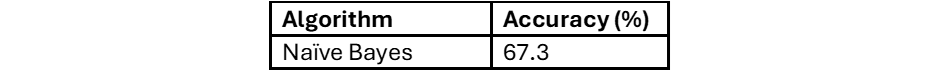

<div style="text-align: right;">
<sup>[3]</sup>
</div>       

<p style="line-height:2.0">The study by Hani et al. <sup>[4]</sup> proposes an approach evaluated on a cyberbullying dataset from Kaggle which had already been collected and labelled. The performance of SVM (Support Vector Machine) and NN (Neural Network) classifiers are compared with experiments run on different n-grams including 2, 3 and 4-grams.</p>

<p style="line-height:2.0">The approach taken by Hani et al include tokenisation of words from sentences or paragraphs, lowercasing of the text, removal of stop words and encoding characters like ‘\n’ or ‘\t’ which do not provide meaningful information and word correction which takes the most similar words using a distance metric between the original word and another word. After this, the feature extraction step occurs where features are extracted using TFIDF which ascribes weights to words, and the level of n-grams to use are also specified.</p>


<p style="line-height:2.0">The final step involves classification where extracted features are fed into a classification algorithm for training and testing. The two classifiers used in this study were SVM and NN.
Results are shared below:
</p>





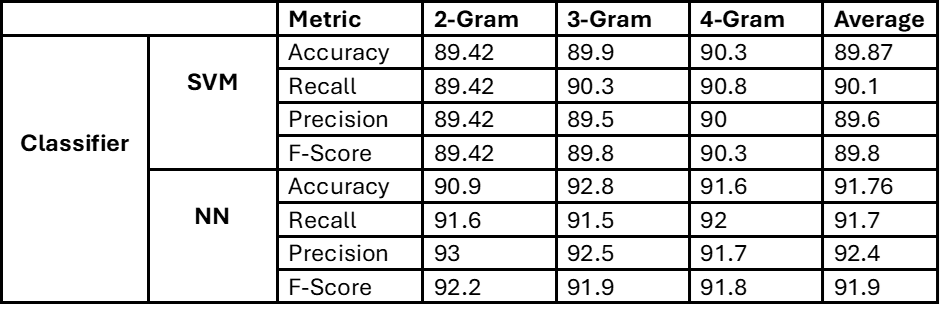

<div style="text-align: right;">
<sup>[4]</sup>
</div>   

<p style="line-height:2.0">The NN model outperforms SVM in all metrics but not by a significant margin. For the accuracy metric of SVM, training for higher n-grams leads to a higher accuracy, but not by a significant margin.
</p>

Literature Review Key Findings:

<ul>

•	Preprocessing is an important step which includes the removal of stop words, special characters, pronouns etc. which can improve model accuracy
    
    
    
•	A bag of words can be used to represent textual data
    
    
•	TFIDF can be used ascribe weights to words and provide a numerical representation
    
    
•	SVM, Naïve Bayes and NN models can be used for classification
    
    
•	Models can be run for varying number of n-grams, where higher n-grams give better accuracy


## Dataset Description

<p style="line-height:2.0"> The dataset is called Cyberbullying Classification and is from Kaggle (see source 5 from references)

In [1]:
# import the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import html
# tweet-preprocessor imported as p
import preprocessor as p
import contractions

import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [2]:
# reads in 'cyberbullying_tweets.csv' as a dataframe
df = pd.read_csv('cyberbullying_tweets.csv')

In [3]:
# displays the first 5 rows of the dataframe
df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


<u>DataFrame Null Values</u>

In [4]:
# counts null values for each column in the dataframe
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

The DataFrame has no null values in all columns

<u>Duplicate rows</u>

In [5]:
# Counts the number of duplicate rows in the dataframe
df.duplicated().sum()

36

The DataFrame has 36 duplicate rows

<u>DataFrame Shape</u>

In [6]:
print(df.shape)

(47692, 2)


The dataset contains 47,692 rows of data with 2 columns; ‘tweet_text’ which contains the content of a tweet and ‘cyberbullying_type’ which is the class the tweet falls into. 

<u>DataFrame statistics</u>

In [7]:
# Computes the length of each element in the 'tweet_text' columns and assigns this to a new column 'length'
df['length'] = df['tweet_text'].str.len()

In [8]:
# Generates a DataFrame of descriptive statistics and transposes it 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
length,47692.0,136.253229,85.226899,1.0,78.0,124.0,180.0,5018.0


- The average length of a tweet is around 136 characters


- The shortest tweet is 1 character and longest is 5018 characters, which seems very long for a tweet

In [9]:
df[df['length'] ==1]

,tweet_text,cyberbullying_type,length
28855,💩,other_cyberbullying,1
31286,.,other_cyberbullying,1


- The shortest tweets consist of an emoji or a punctuation mark. These are not very informative

In [10]:
df[df['length'] ==5018]

,tweet_text,cyberbullying_type,length
29205,is feminazi an actual word with a denot…\r\n@N...,other_cyberbullying,5018


In [11]:
df.iloc[29205, 0][:992]

"is feminazi an actual word with a denot…\r\n@Nasharchy my job means protecting people. even the people i don't agree with/like.\r\nThey barely cooked anything on that entrée #MKR\r\nRT @kf: Like, no. If a community fostering jerks prevents users from adopting that community's code, it is very much a technical problem.\r\nIt's almost time. :)\r\n@JamesGweenwood shock youre bullying me again.\r\n@LionLionEatEat yeah, someone DMed me a screenshot. meh. let her. i have no idea who she even is.\r\nFor more egregious cases for harassment, we definitely need to be able to respond to those appropriately. But most toxicity isn't this.\r\nSo, this happened. http://t.co/ZPTRtsYFiV\r\n@Nibelsnarfabarf @srhbutts @GRIMACHU it is really funny all the assumptions they make about how it works - and how much they are wrong.\r\nThe lack of self-awareness from @wadhwa right now is staggering and hilarious. #stopwadhwa2015\r\nHahahaha http://t.co/JRPkJCNVH9\r\nThis is going to be a better finale than how 

- The longest tweet is heavily detailed describing a mix of discussion on language, personal opinions and reactions , interactions with others etc. At 5018 characters, it is unusually long for a tweet.

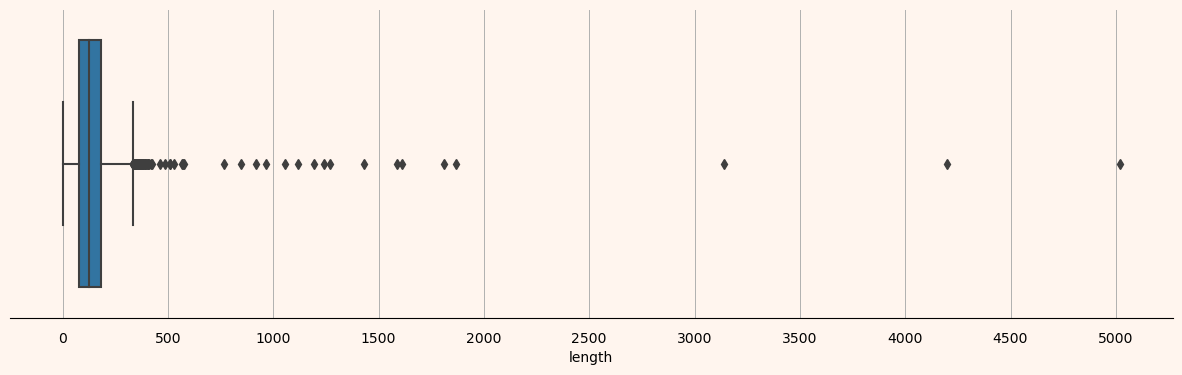

In [12]:
plt.figure(figsize=(15, 4), facecolor='seashell')
sns.boxplot(data=df, x='length')

# adds # adds horizontal grid lines from y ticks on y axis with zorder lower than barplot to not overlap barplot
plt.grid(axis = 'x', linewidth = 0.7, zorder=1)

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# x ticks start 0 and go  up until 5500 in increments of 500
plt.xticks(ticks=range(0, 5500, 500))

# removes tick length from x axis and creates distance
plt.tick_params(axis = 'x', length = 0, pad = 10)

# removes tick length from y axis and creates distance
plt.tick_params(axis = 'y', length = 0)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

plt.show()

- The vast majority of the data lies between lengths of 1 and 333 characters


- 50% of tweets have a length between 78 and 180 characters


- Tweets with lengths over 333 are considered outliers

<u>Cyberbullying classes</u>

In [13]:
# prints the number of unique values in cyberbullying_type column
print('There are', df['cyberbullying_type'].nunique(), 'cyberbullying classes. These classes are:')

# prints a blank line line
print('')

# iterates through unique values within 'cyberbullying_type' column and prints this 
for i in df['cyberbullying_type'].unique():
    print(i)

There are 6 cyberbullying classes. These classes are:

not_cyberbullying
gender
religion
other_cyberbullying
age
ethnicity


- There are 6 different classes including ‘not_cyberbullying’, ‘gender’, ‘religion’, ‘other_cuberbullying’, ‘age’, and ‘ethnicity’.  

<div style="text-align: right;">
<sup>[5]</sup>
</div>   

In [14]:
df_cyberbully_classes = df['cyberbullying_type'].value_counts().to_frame().reset_index()

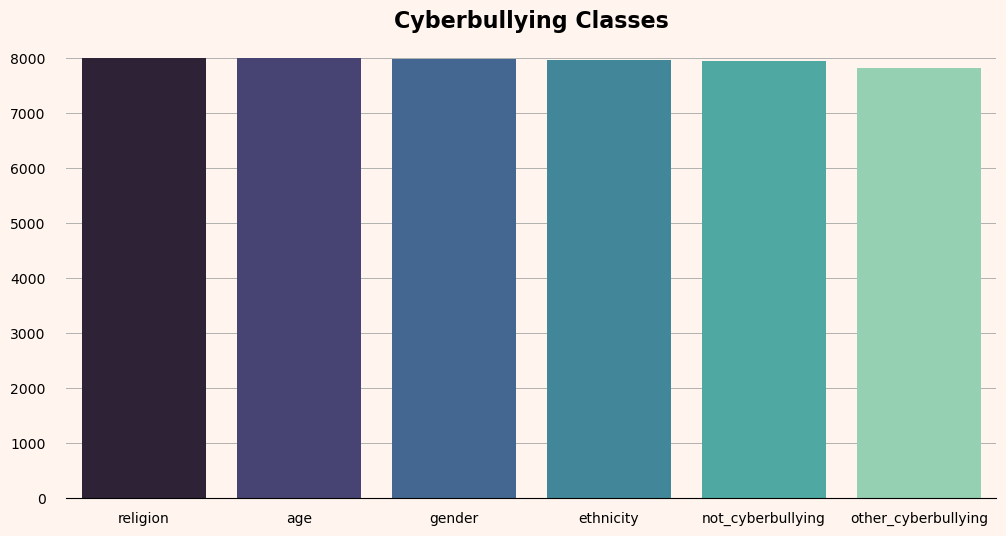

In [15]:
# creates figure with the specified figsize which defines width and height and defines 
# background colour surrounding axes
plt.figure(figsize=(12, 6), facecolor='seashell')

# Sets title for the visualisation
plt.title(label='Cyberbullying Classes',
          fontsize=16,
          y=1,
          fontweight='bold'
         )

# adds # adds horizontal grid lines from y ticks on y axis with zorder lower than barplot to not overlap barplot
plt.grid(axis = 'y', linewidth = 0.7, zorder=1)

# produces the barplot visualisation
sns.barplot(data=df_cyberbully_classes, 
            x = 'index', 
            y = 'cyberbullying_type', 
            hue= 'index',
            palette="mako",
            dodge=False,
            zorder=2)

# changes backgorund to colour of plot itself to 'seashell' colour
plt.gca().set_facecolor('seashell')

# removes tick length from x axis and creates distance
plt.tick_params(axis = 'x', length = 0, pad = 10)

# removes tick length from y axis and creates distance
plt.tick_params(axis = 'y', length = 0, pad = 15)

# Removes the required spines (borders) from the plot
sns.despine(top = True, right = True, left = True, bottom = False)

# Sets xlabel to '' essentially removing it
plt.xlabel('')

# Sets ylabel to '' essentially removing it
plt.ylabel('')

# Remove legend
plt.legend().remove()

# Shows plot
plt.show()

In [16]:
df[ 'cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

- The number of instances of each class is similar. Any class imbalalnce is negligible. 

In [17]:
df.columns = ['text', 'type', 'length']

# Methods

<p style="line-height:2.0">Text Preprocessing is an important step to ensure text data is structured appropriately and made suitable for analysis or modelling. Used in this project are the following text preprocessing and classification methods:
</p>

## Text Preprocessing

<u>Expansion of contractions</u>

<p style="line-height:2.0">
Contractions are word or word combinations shorted by replacing letters with an apostrophe. These are common in all forms of communication from social media to texts and emails. Examples include “aren’t” which is a contraction of “are not” or “I’ll” which is a contraction of “I will”. Expansion of contractions contributes to text standardisation and can unveil important sentiments in its uncontracted form. The contractions library was installed and applied in Python for this purpose. <sup>[6]</sup>
</p>

<u>Text cleaning with tweet preprocessor</u>

<p style="line-height:2.0">
The tweet preprocessor library is used to easily clean tweets. It can clean URLs, Hashtags, Mentions, Reserved words, Emojis and Smileys from tweet text data. <sup>[7]</sup>
</p>

<u>Text cleaning with custom clean function</u>

<p style="line-height:2.0">
A custom clean function was defined to further clean tweet text data. 
The html.unescape() method was used to convert ascii string to html script, replacing these with special characters.<sup>[8]</sup></p>
    
<p style="line-height:2.0">    
Regular Expressions (regex) were also used. Regex allows for powerful pattern matching for finding and replacing text exhibiting certain patterns. Different pattern rules can be created to automatically clean text based on those patterns.<sup>[9]</sup> </p>
    

<p style="line-height:2.0"> 
Different regex patterns were used such to convert html escapes to remove tags, urls, text in brackets, special characters, sequences of two or more characters e.g. --- or ==, sequences of whitespace, punctuation, underscores and upper and lower cases of http and https.
</p> 

<p style="line-height:2.0"> 
The tweet text data was further cleaned by lowercasing. This is important to ensure that different cases for the same word are not treated separately. E.g. ‘Cat, ‘cat’, and ‘CAT’. By lowercasing these to ‘cat’, it is ensured that these are not treated as separate words.<sup>[10]</sup>
 </p>

<u>Word tokenisation and removal of stop words</u>

<p style="line-height:2.0">
Tokenization processes text data by converting a text sequence into smaller parts like words. These are called tokens. This helps machines understand by breaking human language into smaller pieces. The NLTK word tokeniser was used for this task.<sup>[11]</sup></p>
    
<p style="line-height:2.0">    
Stop words such as ‘the’, ‘is’, ‘for’ etc. are irrelevant as they contribute very little to the context. By removing stopwords, text is represented in a meaningful way without losing its context. This also reduces the number of unnecessary features.<sup>[11]</sup> </p>

<u>Lemmatization</u>

<p style="line-height:2.0">
Many words are derived from others in the English language. e.g. an inflected word such as ‘normality’ is derived from the word ‘norm’ which is the root form. It is helpful in text preprocessing to reduce words to their root form from derived counterparts.<sup>[12]</sup></p>
    
<p style="line-height:2.0">    
Lemmatization is a technique to reduce inflected words to their respective lemmas (dictionary forms) so unlike stemming, lemmatization does not just cut words off, but context is taken into consideration. This reduces randomness and reduces the number of features a computer must process, thereby increasing efficiency.<sup>[12]</sup> </p>

<u>Removing Repetitions</u>

<p style="line-height:2.0">
A function was defined to remove consecutive repeated characters unless the word is already a valid word in the WordNet dictionary<sup>[12]</sup></p>

<p style="line-height:2.0">
All the above methods had been applied to the data using a master pipeline function along with standard preprocessing methods such as dropping of duplicate rows.
</p>
    
<p style="line-height:2.0">
Rows which were empty were replaced by nans after which rows containing nan were dropped too.
</p>
    
<p style="line-height:2.0">
Rows that had a character length of less than 10 were also dropped as it was assumed that these texts would have little or no meaning.
</p>
 
<p style="line-height:2.0">
The class, ‘other_cyberbullying’ was also dropped. This class is too broad and not a specific type of cyberbullying as some of the other classes. It is not meaningful to include this in the model classification.
</p>

## Text Modelling 

<u>Class Imbalance</u>

<p style="line-height:2.0">
Data which has skewed proportions of different classes is imbalanced. Classes responsible for a larger proportion of observations are majority classes. Classes with smaller proportions are minority classes. This is problematic as during training, the model will largely learn from majority classes and not learn enough from minority classes thereby introducing bias into the model. The model should generalise well and it cannot do this if classes are imbalanced.<sup>[13]</sup></p>

<p style="line-height:2.0">
The classes were already relatively balanced. The class with the highest number of observations was religion with 7932 and the class with the lowest was not_cyberbullying with 7080 observations.
</p>

<p style="line-height:2.0">
Downsampling is to train using a subset of the majority classes, making their proportions like that of the minority classes. While the classes for this dataset were relatively balanced, to improve on any imbalance, classes were downsampled to 7080 observations each. <sup>[13]</sup></p>
</p>

<u>Train and Test Split</u>

<p style="line-height:2.0">
The train and test split is used to evaluate the performance of a machine learning algorithm. The train set is used to train and fit the model and the test is used to evaluate the performance of the model.<sup>[14]</sup></p>

<p style="line-height:2.0">
While using the train test split, 80% of the data was used to train the model and 20% used for testing. The type column (i.e. the class) was stratified to ensure an equal proportion of all classes in the train and test sets.For reproducibility, the random_state parameter was also specified.


<u>TF-IDF Vectoriser</u>

<p style="line-height:2.0">
Term Frequency Inverse Document Frequency (TF-IDF) is a measure of how relevant a word is. The term frequency (TF) represents the number of instances of a given word in a document. The document frequency (DF) represents the number of documents in which that word is present. The inverse of the document frequency (IDF) is taken and the TF and IDF values are multiplied to give the TF-IDF. TF-IDF essentially assigns a weighting to the words. Words with higher weights are deemed more significant. The TFIDF vectorizer was used in this project to convert the collection of different cleaned tweet documents into a matrix of TF-IDF features.<sup>[15]</sup></p>


<u>Grid Search with Cross Validation</u>

<p style="line-height:2.0">
GridSearchCV is used for hyperparameter tuning and cross validation. Different ranges of hyperparameters are specified in a dictionary and the grid search explores each possible combination of hyperparameters where each combination is evaluated against an evaluation metric like accuracy.<sup>[16]</sup></p>
    
<p style="line-height:2.0">
Cross validation is also performed alongside the Grid Search which divides the train data further into train and validation sets. In K-fold Cross Validation. Data is divided into K partitions. In each iteration, K-1 partitions are used for training while the K partition is used for testing. Each iteration will record the performance of the model. After all iterations have been run, at the end, an average performance is given.<sup>[16]</sup></p>


For this project, the best model after the GridSearchCV process took place was used.


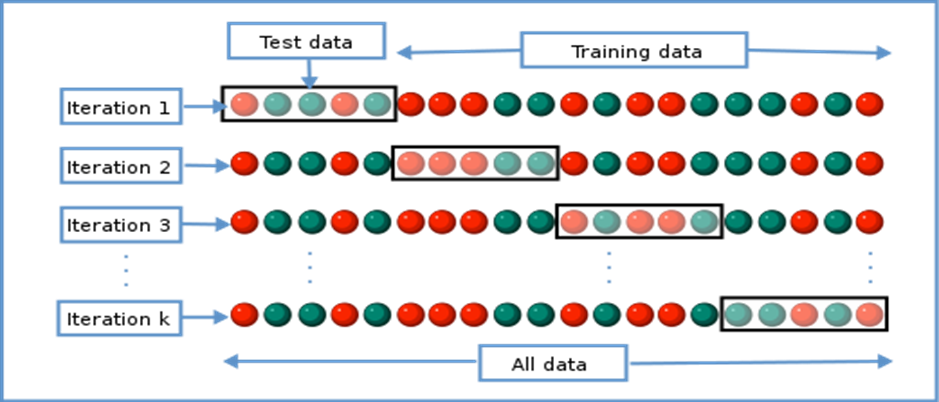

<div style="text-align: right;">
<sup>[16]</sup>
</div>  

## Text Classification

<u>Dummy Classifier</u>

<p style="line-height:2.0">
The dummy classifier provides baseline performance for the other models to be compared to. The classifiers behaviour is independent of the training data and classes are predicted using another strategy.
 <sup>[18]</sup></p>

<u>Linear SVC</u>

<p style="line-height:2.0">
Linear Support Vector Classification (Linear SVC) is an implementation of Support Vector Machine (SVM) specifically for linearly separable data. It works by attempting to find a hyperplane in N-dimensional space that can classify datapoints. In theory, many hyperplanes can achieve this however the objective of the algorithm is to find a plane that has maximum margin or distance between data points of different classes.<sup>[18]</sup></p>

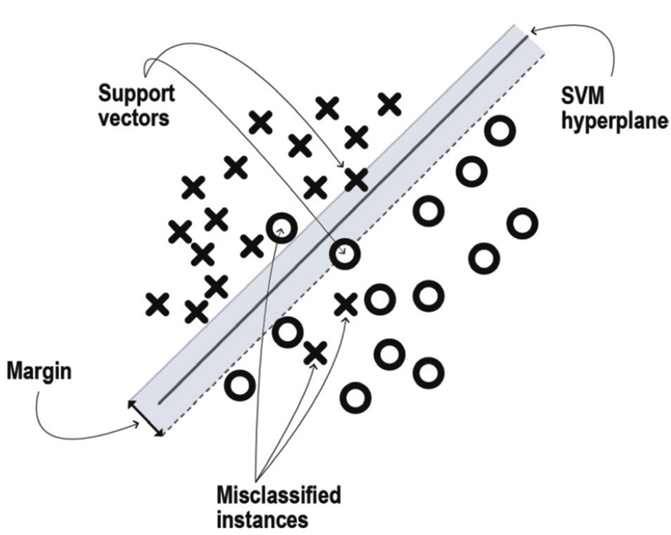

<div style="text-align: right;">
<sup>[18]</sup>
</div>  

<u>Naïve Bayes</u>

<p style="line-height:2.0">
This is a classification technique based on Bayes Theorem. It is a simple, fast, accurate and reliable algorithm. It assumes that the effect of a certain feature in a class is independent of other features e.g. for a loan applicant, that income, age, location etc. are independent of each other even though these factors may be interdependent. This does, however, simplify computation hence the ‘naïve’ in the name.<sup>[19]</sup></p>

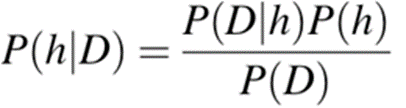

<div style="text-align: right;">
<sup>[19]</sup>
</div>  

# Experimental Setup

### Data Pre-Processing

<u>Drop duplicate Rows</u>

In [18]:
# Drop duplicate rows
df = df.drop_duplicates()

<u>Expand Contractions Function</u>

In [19]:
# This function expands contractions 
def expand(text):
    # applies the fix method to text to expand contractions
    text = contractions.fix(text)
    return text

<u>Application of clean function using tweet-preprocessor</u>

In [20]:
# This function cleans text using the tweet-preprocessor
def preprocessor(text):
    # applies the clean metho to text to clean tweets using the tweet-preprocessor
    text = p.clean(text)
    return text

<u>Application of clean function using defined function</u>

In [21]:
def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text) 
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    # Removes punctuation from text
    text = re.sub(r'[^\w\s]', '', text)
    # replaces underscore with an empty space
    text = re.sub(r'_', ' ', text)
    # removes http and https regardles of whether they are upper or lower case
    text = re.sub(r'\bhttps?\b', '', text, flags=re.IGNORECASE)
    # makes text lowercase
    text = text.lower()
    # Removes any leading and trailing whitespaces
    return text.strip()

<div style="text-align: right;">
<sup>[20]</sup><sup>[21]</sup>
</div>  

<u>Word Tokenisation and Removal of Stopwords</u>

In [22]:
# A list of stop words from the NLTK Corpus. These are common words that carry little meaning
stopword_list = stopwords.words('english')

# A function to tokenize words and filter out stopwords
def tokens_minus_stop(text):
    # Tokenizes the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens_minus_stop = [word for word in tokens if word not in stopword_list]
    return tokens_minus_stop

<u>Lemmatisation</u>

In [23]:
# initialises an instance of the WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatizer(tokens):
    #applies the lemmatize method to each token to lemmatize it
    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
    return lemmatized_tokens

<u>Removing repetitions</u>

In [24]:
def remove_repeated_characters(tokens):
    # repeat pattern defined in regex
    repeat_pattern = re.compile(r'(\w*)(\w)\2(\w*)')
    match_substitution = r'\1\2\3'
    def replace(old_word):
        if wordnet.synsets(old_word):
            return old_word
        new_word = repeat_pattern.sub(match_substitution, old_word)
        return replace(new_word) if new_word != old_word else new_word
            
    correct_tokens = [replace(word) for word in tokens]
    return correct_tokens

<div style="text-align: right;">
<sup>[20]</sup>
</div>  

### Apply Pipeline

In [25]:
# a pipeline function that runs the nlp pre-processing functions defined previously sequentially
def pipeline(text):
    
    text = expand(text)
    
    text = preprocessor(text)
    
    text = clean(text)
    
    tokens = tokens_minus_stop(text)
    
    tokens = lemmatizer(tokens)
    
    tokens = remove_repeated_characters(tokens)
    
    return ' '.join(tokens)

In [26]:
# applies the pipeline function to the 'text' column of the dataframe to create a new column called 'clean_text'
df['clean_text'] = df['text'].apply(pipeline)

In [27]:
# slices dataframe to keep only 'clean_text' and 'type' columns
df = df[['clean_text', 'type']]

<u>replace empty strings with nan</u>

In [28]:
# replaces empty strings in 'clean_text' column with nan
df['clean_text'] = df['clean_text'].replace('', np.nan)

<u>check nulls and remove</u>

In [29]:
# counts the nulls within each column of the dataframe
df.isnull().sum()

clean_text    549
type            0
dtype: int64

In [30]:
# drops rows where 'clean_text' contains nan
df = df.dropna(subset=['clean_text'])

<u>check duplicates and remove</u>

In [31]:
# Counts the number of duplicate rows in the dataframe
df.duplicated().sum()

1270

In [32]:
# Drops duplicate rows from the datframe
df = df.drop_duplicates()

<u>Filter dataframe to where the clean length is greater tha or equal to 10</u>

In [33]:
# Filters dataframe to where the length of the string for column 'clean_text' is greater than or equal to 10
df = df[df['clean_text'].str.len()>= 10]

<u>drop column other_cyberbullying</u>

- This class is too broad and not a specific type of cyberbullying as some of the other classes. It is not meaningful to include this in the model classification

In [34]:
# filters dataframe to rows where the 'type' column is not 'other_cyberbullying'
df = df[df['type'] != 'other_cyberbullying']

<u>address class imbalance using downsampling</u>

In [35]:
# counts the instances of each class within the 'type' column
df['type'].value_counts()

religion             7932
age                  7853
ethnicity            7687
gender               7449
not_cyberbullying    7080
Name: type, dtype: int64

In [36]:
# filters dataframe to where 'type' is 'religion'
df_religion = df[df['type']=='religion']

# filters dataframe to where 'type' is 'age'
df_age = df[df['type']=='age']

# filters dataframe to where 'type' is 'ethnicity'
df_ethnicity = df[df['type']=='ethnicity']

# filters dataframe to where 'type' is 'gender'
df_gender = df[df['type']=='gender']

# filters dataframe to where 'type' is 'not_cyberbullying'
df_not_cyberbullying = df[df['type']=='not_cyberbullying']

In [37]:
# finds the number of observations for the minority class
n_samples = df['type'].value_counts().min()

# a function to downsample each dataframe with observations greater than minority class
def downsample(df):
    return resample(df, replace=False, n_samples=n_samples, random_state=0)    

In [38]:
# application of the downsample function to each dataframe
df_religion_downsampled= downsample(df_religion)
df_age_downsampled= downsample(df_age)
df_ethnicity_downsampled = downsample(df_ethnicity)
df_gender_downsampled = downsample(df_gender)

In [39]:
# concatenation of downsampled dataframes and dataframe for minority class, 'df_not_cyberbullying'
df =  pd.concat([df_religion_downsampled, 
                 df_age_downsampled, 
                 df_ethnicity_downsampled, 
                 df_gender_downsampled, 
                 df_not_cyberbullying])

In [40]:
# Shuffles all rows within the dataframe
df = df.sample(frac=1, random_state=1)

In [41]:
# counts the instances of each class within the 'type' column. Classes are now balanced
df['type'].value_counts()

age                  7080
religion             7080
not_cyberbullying    7080
gender               7080
ethnicity            7080
Name: type, dtype: int64

<u>Split data into Train and Test</u>

In [42]:
# Splits data into Test and Train sets. 20% of data is used for testing. the rest for training. 'Type' is stratified.
X_train, X_test, Y_train, Y_test = train_test_split(df['clean_text'],
                                                    df['type'],
                                                    test_size=0.2,
                                                   random_state=2,
                                                   stratify=df['type'])


In [43]:
# # counts the instances of each class within the 'type' column of the train data. Classes are balanced
Y_train.value_counts()

religion             5664
not_cyberbullying    5664
ethnicity            5664
gender               5664
age                  5664
Name: type, dtype: int64

In [44]:
# counts the instances of each class within the 'type' column of the test data. Classes are balanced
Y_test.value_counts()

religion             1416
age                  1416
not_cyberbullying    1416
ethnicity            1416
gender               1416
Name: type, dtype: int64

# Results and Evaluation

<p style="line-height:2.0">
Accuracy describes the number of correct predictions over all predictions.
</p>

<p style="line-height:2.0">
Precision is a measure of the proportion of true positives over all of the positive predictions made by the model. It is a measure of how many positive predictions were correct i.e. true positives.
    
<p style="line-height:2.0">
Recall is a measure of the proportion of true positives out of all the actual positives. It is a measure emphasising on how many of the positive cases the classifier correctly predicted.

<p style="line-height:2.0">
The F1 score is a measure which combines both precision and recall being described as the harmonic mean of both.

<div style="text-align: right;">
<sup>[22]</sup>
</div>  
    
<p style="line-height:2.0">
in terms of this project's use case, false positives for cyberbullying would label non-bullying content as bullying leading to uneccesary bans or censorship. This would make precision an important metric to consider. On the other hand, false negatives would incorrectly label bullying content as non-bullying thereby allowing harmful bullying behaviour to continue. As both metrics are important, it is wise to look at the F1 score when interpreting the metrics which incorporates both precision and recall.




### Dummy Classifier

In [45]:
dc = DummyClassifier(strategy='stratified', random_state=4)
dc.fit(X_train, Y_train)
dc_baseline = dc.predict(X_test)
# gets a report of performance
dc_report = classification_report(Y_test, dc_baseline)
print(dc_report)

                   precision    recall  f1-score   support

              age       0.20      0.20      0.20      1416
        ethnicity       0.20      0.20      0.20      1416
           gender       0.22      0.23      0.22      1416
not_cyberbullying       0.20      0.19      0.19      1416
         religion       0.19      0.19      0.19      1416

         accuracy                           0.20      7080
        macro avg       0.20      0.20      0.20      7080
     weighted avg       0.20      0.20      0.20      7080



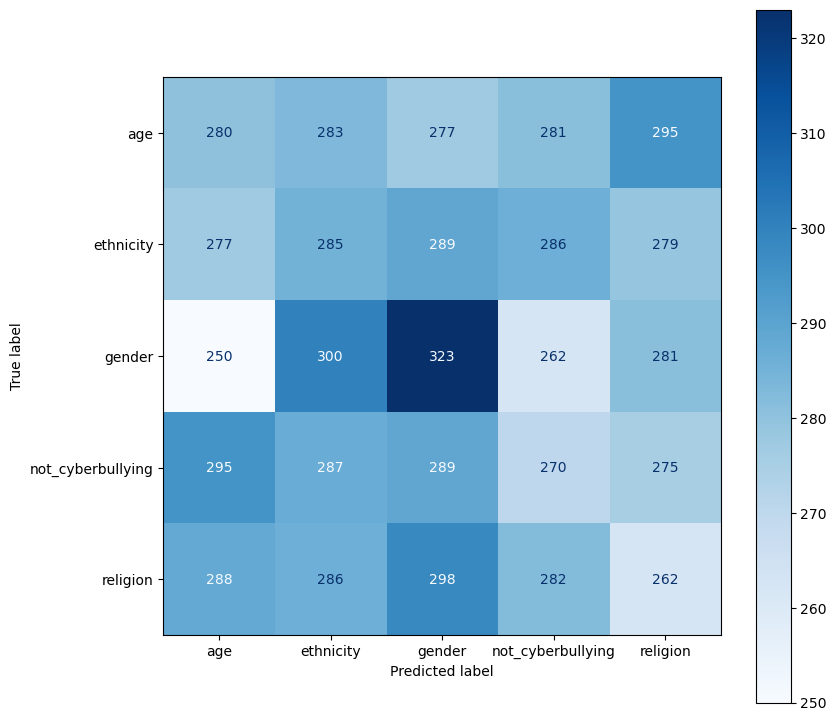

In [46]:
# defines figure and axis variables
fig, ax = plt.subplots(figsize=(9, 9)) 

# defines the confusion matrix
cm = confusion_matrix(Y_test, dc_baseline, labels=dc.classes_)

# applies ConfusionMatrixDisplay function
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dc.classes_)

# defines the 'Blues colormap for the onfusion matrix to use'
disp.plot(ax=ax, cmap='Blues')

# shows the plot
plt.show()

<p style="line-height:2.0">
The dummy classifier provides a baseline for which to compare other classifiers with. The poor performance is due to no meaningful learning or pattern recognition taking place. This is clear in the confusion matrix also, the predictions are roughly proportional to the class distribution.

### Linear SVC

In [47]:
# initiates a pipeline with tfidf and linear svc model steps
svc_training_pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')), 
                                    ('svc', LinearSVC(random_state=3, tol=1e-3, dual='auto'))])

# defines a parameter grid for hyperparamater tuning
svc_grid_param = [{
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': [0.25, 0.5, 0.75],
    'tfidf__min_df': [0.00001, 0.0001, 0.001],
    'svc__loss': ['hinge', 'squared_hinge'],
    'svc__max_iter': [1500, 2500]
}]

# applies the pipeline and hyperparameter tunes using each combination defined in parameter grid
svc_gridsearch = GridSearchCV(estimator=svc_training_pipeline,
                                   param_grid=svc_grid_param,
                                   cv=5)


In [48]:
# fits the gridsearch against the training data
svc_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('svc',
                                        LinearSVC(dual='auto', random_state=3,
                                                  tol=0.001))]),
             param_grid=[{'svc__loss': ['hinge', 'squared_hinge'],
                          'svc__max_iter': [1500, 2500],
                          'tfidf__max_df': [0.25, 0.5, 0.75],
                          'tfidf__min_df': [1e-05, 0.0001, 0.001],
                          'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]}])

In [49]:
# outputs the best parameters of the grid search
svc_gridsearch.best_params_

{'svc__loss': 'hinge',
 'svc__max_iter': 1500,
 'tfidf__max_df': 0.25,
 'tfidf__min_df': 0.0001,
 'tfidf__ngram_range': (1, 2)}

In [50]:
# gets the best model from the gridsearch
svc_best_model = svc_gridsearch.best_estimator_

# Uses best model to predict against test data
svc_pred = svc_best_model.predict(X_test)

# gets a report of performance
svc_report = classification_report(Y_test, svc_pred)
print(svc_report)

                   precision    recall  f1-score   support

              age       0.94      0.98      0.96      1416
        ethnicity       0.97      0.92      0.95      1416
           gender       0.91      0.86      0.89      1416
not_cyberbullying       0.77      0.83      0.80      1416
         religion       0.94      0.94      0.94      1416

         accuracy                           0.91      7080
        macro avg       0.91      0.91      0.91      7080
     weighted avg       0.91      0.91      0.91      7080



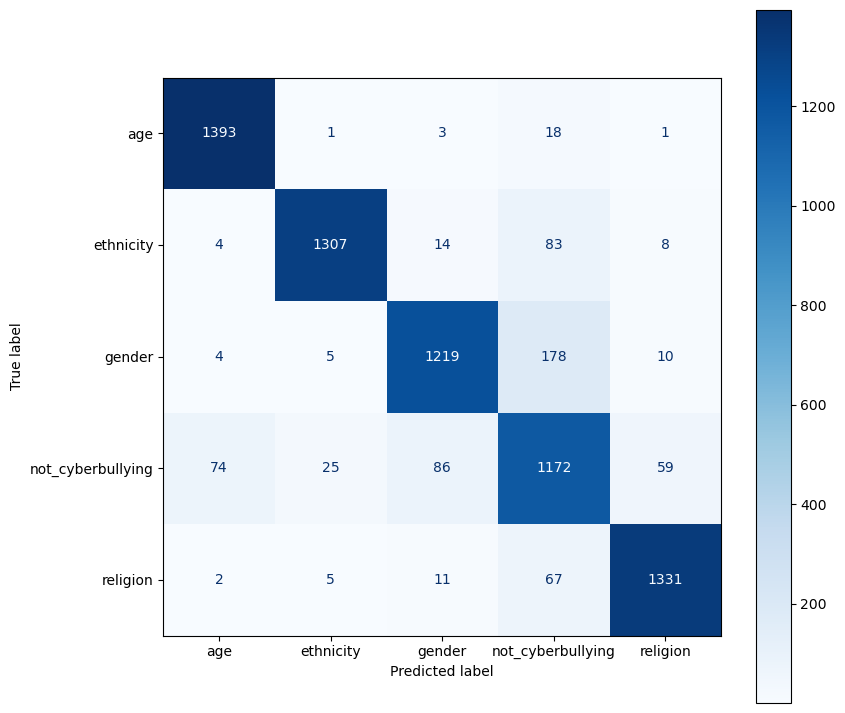

In [51]:
# defines figure and axis variables
fig, ax = plt.subplots(figsize=(9, 9)) 

# defines the confusion matrix
cm = confusion_matrix(Y_test, svc_pred, labels=svc_best_model.classes_)

# applies ConfusionMatrixDisplay function
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_best_model.classes_)

# defines the 'Blues colormap for the onfusion matrix to use'
disp.plot(ax=ax, cmap='Blues')

# shows the plot
plt.show()


<p style="line-height:2.0">
The linear svc model performs well with the classification report showing an overall accuracy and average precision, recall and f1 score of 91%. The vast majority of predictions for all classes were correctly classified as shown by the confusion matrix plot. What is noticeable is from the classification report is that the 'not_cyberbullying' class is the worst performing having the lowest evaluation metrics values. Interestingly, the model performs better using unigrams and bigrams (1, 2) rather than to unigrams, bigrams and trigrams (1, 3). The model also greatly outperforms the dummy classifier showing meaningful learning has taken place</p>

### Naïve Bayes

In [52]:
# initiates a pipeline with tfidf and multinomial Naive Bayes model steps
mnb_training_pipeline = Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words="english")), 
                                    ('mnb', MultinomialNB())])

# defines a parameter grid for hyperparamater tuning
mnb_grid_param = [{
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tfidf__max_df': [0.25, 0.5, 0.75],
    'tfidf__min_df': [0.00001, 0.0001, 0.001],
    'mnb__alpha': [0.1, 1.0, 10.0],
    'mnb__fit_prior': [True, False]
}]

# applies the pipeline and hyperparameter tunes using each combination defined in parameter grid
mnb_gridsearch = GridSearchCV(estimator=mnb_training_pipeline,
                                   param_grid=mnb_grid_param,
                                   cv=5)

In [53]:
# fits the gridsearch against the training data
mnb_gridsearch.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('mnb', MultinomialNB())]),
             param_grid=[{'mnb__alpha': [0.1, 1.0, 10.0],
                          'mnb__fit_prior': [True, False],
                          'tfidf__max_df': [0.25, 0.5, 0.75],
                          'tfidf__min_df': [1e-05, 0.0001, 0.001],
                          'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]}])

In [54]:
# outputs the best parameters of the grid search
mnb_gridsearch.best_params_

{'mnb__alpha': 1.0,
 'mnb__fit_prior': True,
 'tfidf__max_df': 0.25,
 'tfidf__min_df': 0.0001,
 'tfidf__ngram_range': (1, 3)}

In [55]:
# gets the best model from the gridsearch
mnb_best_model = mnb_gridsearch.best_estimator_

# Uses best model to predict against test data
mnb_pred = mnb_best_model.predict(X_test)

# gets a report of performance
mnb_report = classification_report(Y_test, mnb_pred)
print(mnb_report)

                   precision    recall  f1-score   support

              age       0.84      0.98      0.90      1416
        ethnicity       0.92      0.90      0.91      1416
           gender       0.89      0.83      0.86      1416
not_cyberbullying       0.80      0.61      0.69      1416
         religion       0.83      0.97      0.90      1416

         accuracy                           0.86      7080
        macro avg       0.86      0.86      0.85      7080
     weighted avg       0.86      0.86      0.85      7080



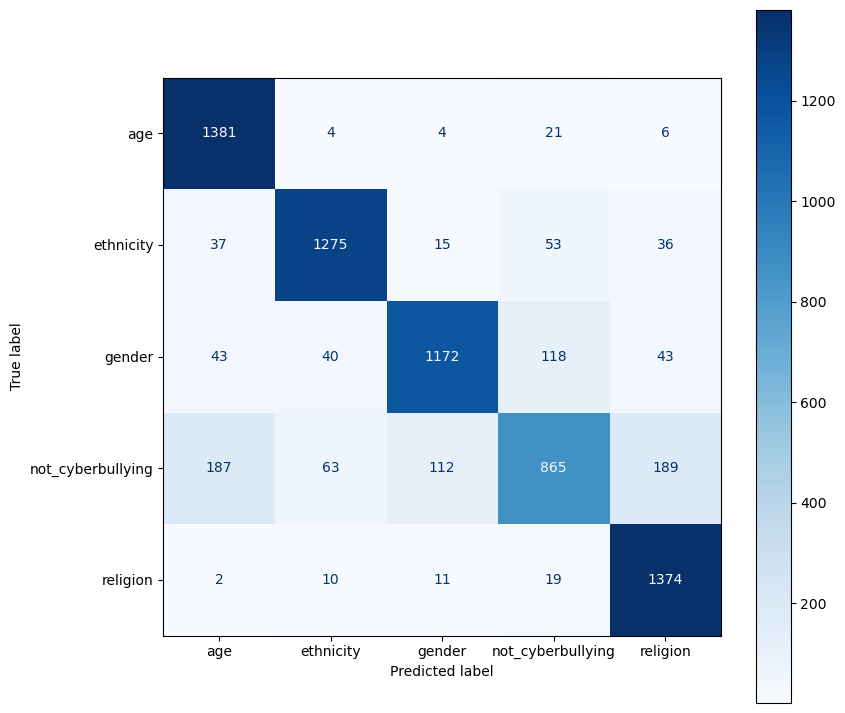

In [56]:
# defines figure and axis variables
fig, ax = plt.subplots(figsize=(9, 9)) 

# defines the confusion matrix
cm = confusion_matrix(Y_test, mnb_pred, labels=mnb_best_model.classes_)

# applies ConfusionMatrixDisplay function
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=mnb_best_model.classes_)

# defines the 'Blues colormap for the onfusion matrix to use'
disp.plot(ax=ax, cmap='Blues')

# shows the plot
plt.show()


<p style="line-height:2.0">
The multinomial naive bayes model also performs well with the classification report showing an overall accuracy and average precision, recall and of 86% and average f1-score of 85%. It has performed worse than the linear svc model The vast majority of predictions for all classes were correctly classified as shown by the confusion matrix plot. Again, the classification report shows that the 'not_cyberbullying' class is the worst performing having the lowest evaluation metrics values. As with linear svc, multinomial naive bayes performs better using unigrams and bigrams (1, 2) rather than to unigrams, bigrams and trigrams (1, 3). The model also greatly outperforms the dummy classifier showing meaningful learning has taken place </p>

# Discussion

<p style="line-height:2.0">
Both Linear SVC and Multinomial Naive Bayes have respectable metric scores and outperform the results from the study by Sanchez et al.<sup>[3]</sup> and are on par with the results from study by Hani et al.<sup>[4]</sup>. The study by Hani et al also suggested that model metrics would improve for higher N-gram. This was not found to be the case for both models as both models performed better with N grams (1, 2) than (1, 3) during hyperparameter tuning via GridSearchCV. Both models outperform the dummy classify by a considerable margin showing meaningful learning has taken place, however, the linear svc model has superior metrics. The linear SVC algorithm is more complex than Multinomial Naive Bayes, which is a very simple algorithm, so linear SVC may be better at capturing patterns that would otherwise be unnoticeable to Multinomial Naive Bayes hence its better performance. Both models metrics were lowest for the not_cyberbullying class. As this class is a very general and broad class, the model may not have learnt what constitues a text to be 'not_cyberbullying'.

# Conclusion

<p style="line-height:2.0">
This report has shown show that using a NLP pipeline and machine learning classification algorithms can indeed be used to classify tweet text data and thereby can be used as a tool to combat cyberbullying. It is important to balance precision with recall using the f1 score so as to minimise the impact of both False Positives and False Negatives. Hyperparameter tuning via GridSearchCV could be used more extensively however there were limitations with computational resources. An area of improvement for this report involves training another classification model and using this in collaboration with Linear SVC and Multinomial Naive Bayes and creating an enseble classification model which functions using majority voting. This should hopefully combine the benefits of all models and give better performance.</p>

# References

[1] UNICEF (2024). Cyberbullying: What is it and how to stop it. [online] UNICEF. Available at: https://www.unicef.org/end-violence/how-to-stop-cyberbullying.

[2] Saravanaraj, A. & Immanuvelrajkumar, Sheeba & Devaneyan, Pradeep. (2019). AUTOMATIC DETECTION OF CYBERBULLYING FROM TWITTER. 

[3] Sanchez, Huascar & Kumar, Shreyas. (2011). Twitter Bullying Detection.

[4] Hani, J. & Nashaat, M. & Ahmed, M. & Emad, Z. & Amer, E. & Mohammed, A. (2019). Social Media Cyberbullying Detection using Machine Learning. International Journal of Advanced Computer Science and Applications. 10. 703-707. 10.14569/IJACSA.2019.0100587. 

[5] Kaggle. Cyberbullying Classification. [online] Available at: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification.

[6] GeeksforGeeks. (2022). NLP - Expand contractions in Text Processing. [online] Available at: https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/.

[7] PyPI. (2020). tweet-preprocessor: Elegant tweet preprocessing. [online] Available at: https://pypi.org/project/tweet-preprocessor/.

[8] Jiten. (2023). GeeksforGeeks. .html.unescape() in python. [online] Available at: https://www.geeksforgeeks.org/html-unescape-in-python-2/.

[9] dataheadhunters.com. (2024). Text Data Cleaning: Techniques for Preprocessing and Normalization. [online] Available at: https://dataheadhunters.com/academy/text-data-cleaning-techniques-for-preprocessing-and-normalization/.

[10] Kunwar, H. (2021). Text Preprocessing made easy! [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-made-easy/.

[11] Awan, A. (2023). Text Preprocessing made easy! [online] DataCamp. Available at: https://www.datacamp.com/blog/what-is-tokenization.

[12] Pykes, K. (2023). Stemming and Lemmatization in Python. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/stemming-lemmatization-python.

[13] Google Developers. Imbalanced Data. [online] Available at: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data.

[14] Sarah (2022). How to split the Dataset With scikit-learn’s train_test_split() Function. GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/.

[15] riturajsaha (2023). Understanding TF-IDF (Term Frequency-Inverse Document Frequency). [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/.

[16] Shah, R. (2024). GridSearchCV |Tune Hyperparameters with GridSearchCV. [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/.

[17] Gupta, A. (2019). ML | Dummy classifiers using sklearn. GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/ml-dummy-classifiers-using-sklearn/.

[18] Fawzy, K. (2023). LinearSVC (Classification). LinkedIn [online] Available at: https://www.linkedin.com/pulse/linearsvc-classification-kirolos-fawzy-z5wof/.

[19] Awan, A. (2023). Naive Bayes Classifier Tutorial: with Python Scikit-learn. [online] www.datacamp.com. Available at: https://www.datacamp.com/tutorial/naive-bayes-scikit-learn.

[20] Al-Ani, J. (2024) Advanced Data Applications Notebooks and Packages. DSC6001M Advanced Data Applications. York St John University.

[21]Manjeet (2023). Python | Remove punctuation from string. GeeksforGeeks. [online] Available at: https://www.geeksforgeeks.org/python-remove-punctuation-from-string/.

[22] Kanstrén, T. (2020). A Look at Precision, Recall, and F1-Score. [online] Medium. Available at: https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec.
